In [1]:
% load_ext autoreload
% autoreload 2

import os

import matplotlib.pyplot as plt
import torch

opj = os.path.join
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# adaptive-wavelets modules
from awd.mdata.biology import get_dataloader
from awd.utils import get_wavefun
from awd.transform1d import DWT1d
from awd.models.models import CNN

# params
wave = 'db5'
mode = 'zero'
J = 4

# initialize 2d model

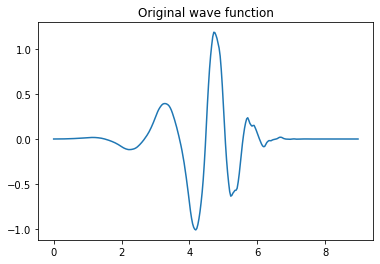

In [2]:
# initialize model
wt = DWT1d(wave=wave, mode=mode, J=J).to(device)

# visualize
phi_orig, psi_orig, x_orig = get_wavefun(wt)
plt.plot(x_orig, psi_orig)
plt.title('Original wave function')
plt.show()

# load bio data
For larger data, can use a dataloader rather than just an array

In [3]:
data_loader, _ = get_dataloader('../data/biology', batch_size=2936)
X = next(iter(data_loader))[0]
print(X.shape)

torch.Size([2936, 1, 40])


# fit adaptive wavelet to the data

In [4]:
wt.fit(X=X, lr=1e-2, num_epochs=10)  # this function alternatively accepts a dataloader

Starting Training Loop...
Train Epoch: 0 [0/2936 (0%)]	Loss: 4.436715
====> Epoch: 0 Average train loss: 4.4367
Train Epoch: 1 [0/2936 (0%)]	Loss: 6.254728
====> Epoch: 1 Average train loss: 6.2547
Train Epoch: 2 [0/2936 (0%)]	Loss: 4.489949
====> Epoch: 2 Average train loss: 4.4899
Train Epoch: 3 [0/2936 (0%)]	Loss: 5.589006
====> Epoch: 3 Average train loss: 5.5890
Train Epoch: 4 [0/2936 (0%)]	Loss: 5.091020
====> Epoch: 4 Average train loss: 5.0910
Train Epoch: 5 [0/2936 (0%)]	Loss: 4.405873
====> Epoch: 5 Average train loss: 4.4059
Train Epoch: 6 [0/2936 (0%)]	Loss: 4.640895
====> Epoch: 6 Average train loss: 4.6409
Train Epoch: 7 [0/2936 (0%)]	Loss: 4.988516
====> Epoch: 7 Average train loss: 4.9885
Train Epoch: 8 [0/2936 (0%)]	Loss: 4.940691
====> Epoch: 8 Average train loss: 4.9407
Train Epoch: 9 [0/2936 (0%)]	Loss: 4.617326
====> Epoch: 9 Average train loss: 4.6173


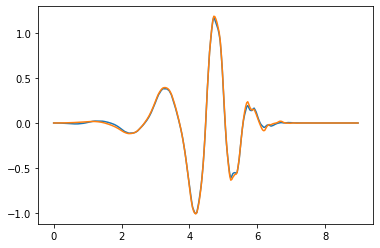

In [5]:
phi, psi, x = get_wavefun(wt)
plt.plot(x, psi)
plt.plot(x_orig, psi_orig)

# add in pre-trained mnist model

In [23]:
# load a pre-trained CNN on MNIST (which acheives 99% acc)
cnn = CNN().to(device)
cnn.load_state_dict(torch.load('../data/mnist/CNN.pth'))
cnn.eval()

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [33]:
wt = DWT2d(wave=wave, mode=mode, J=J).to(device)
wt.fit(X=X, pretrained_model=cnn, lr=1e-1, num_epochs=30,
       lamL1attr=5)  # this function alternatively accepts a dataloader

Starting Training Loop...
Train Epoch: 0 [0/200 (0%)]	Loss: 5568.318359+0.000001j
====> Epoch: 0 Average train loss: 5568.3184+0.0000j
Train Epoch: 1 [0/200 (0%)]	Loss: 4036649.250000+0.000002j
====> Epoch: 1 Average train loss: 4036649.2500+0.0000j
Train Epoch: 2 [0/200 (0%)]	Loss: 22245920.000000+0.000001j
====> Epoch: 2 Average train loss: 22245920.0000+0.0000j
Train Epoch: 3 [0/200 (0%)]	Loss: 3076850.750000+0.000001j
====> Epoch: 3 Average train loss: 3076850.7500+0.0000j
Train Epoch: 4 [0/200 (0%)]	Loss: 3898468.500000+0.000002j
====> Epoch: 4 Average train loss: 3898468.5000+0.0000j
Train Epoch: 5 [0/200 (0%)]	Loss: 4019536.000000+0.000002j
====> Epoch: 5 Average train loss: 4019536.0000+0.0000j
Train Epoch: 6 [0/200 (0%)]	Loss: 3873358.000000+0.000002j
====> Epoch: 6 Average train loss: 3873358.0000+0.0000j
Train Epoch: 7 [0/200 (0%)]	Loss: 3483141.750000+0.000001j
====> Epoch: 7 Average train loss: 3483141.7500+0.0000j
Train Epoch: 8 [0/200 (0%)]	Loss: 2711307.500000+0.000001j

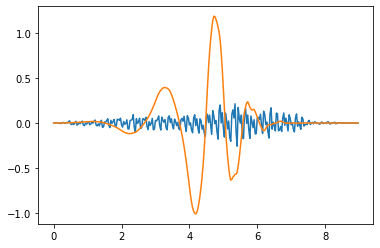

In [34]:
phi, psi, x = get_wavefun(wt)
plt.plot(x, psi)
plt.plot(x_orig, psi_orig)

In [ ]:
# initialize model
wt = DWT2d(wave=wave, mode=mode, J=J).to(device)

# visualize
phi_orig, psi_orig, x_orig = get_wavefun(wt)
plt.plot(x_orig, psi_orig)
plt.title('Original wave function')
plt.show()